In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

customer_data = pd.read_csv("Customer.csv", delimiter=";")
product_data = pd.read_csv("Product.csv", delimiter=";")
store_data = pd.read_csv("Store.csv", delimiter=";")
transaction_data = pd.read_csv("Transaction.csv", delimiter=";")

### Customer Data

In [2]:
customer_data.info()
missing_values = customer_data.isnull().sum()

total_values = len(customer_data)
percentage_missing = (missing_values / total_values) * 100

missing_data_info = pd.DataFrame({
    'Kolom': missing_values.index,
    'Jumlah Missing Values': missing_values.values,
    'Presentase Missing Values (%)': percentage_missing.values
})

print(missing_data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB
            Kolom  Jumlah Missing Values  Presentase Missing Values (%)
0      CustomerID                      0                       0.000000
1             Age                      0                       0.000000
2          Gender                      0                       0.000000
3  Marital Status                      3                       0.671141
4          Income                      0                       0.000000


In [3]:
# Menghitung modus dari kolom "Marital Status"
marital_status_mode = customer_data["Marital Status"].mode()[0]

# Mengisi nilai yang hilang pada kolom "Marital Status" dengan modus
customer_data["Marital Status"].fillna(marital_status_mode, inplace=True)

In [4]:
missing_values = customer_data.isnull().sum()

# Menghitung presentase nilai yang hilang per kolom
total_values = len(customer_data)
percentage_missing = (missing_values / total_values) * 100

# Membuat dataframe untuk menampilkan hasil
missing_data_info = pd.DataFrame({
    'Kolom': missing_values.index,
    'Jumlah Missing Values': missing_values.values,
    'Presentase Missing Values (%)': percentage_missing.values
})

# Menampilkan informasi tentang nilai yang hilang
print(missing_data_info)

            Kolom  Jumlah Missing Values  Presentase Missing Values (%)
0      CustomerID                      0                            0.0
1             Age                      0                            0.0
2          Gender                      0                            0.0
3  Marital Status                      0                            0.0
4          Income                      0                            0.0


In [5]:
customer_data["Income"] = customer_data["Income"].str.replace(',', '').str.replace('.', '')
customer_data["Income"] = customer_data["Income"].astype('int64')

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  447 non-null    object
 4   Income          447 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 17.6+ KB


### Product Data

In [7]:
product_data.info()
# Menghitung jumlah nilai yang hilang per kolom
missing_values = product_data.isnull().sum()

# Menghitung presentase nilai yang hilang per kolom
total_values = len(product_data)
percentage_missing = (missing_values / total_values) * 100

# Membuat dataframe untuk menampilkan hasil
missing_data_info = pd.DataFrame({
    'Kolom': missing_values.index,
    'Jumlah Missing Values': missing_values.values,
    'Presentase Missing Values (%)': percentage_missing.values
})

# Menampilkan informasi tentang nilai yang hilang
print(missing_data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes
          Kolom  Jumlah Missing Values  Presentase Missing Values (%)
0     ProductID                      0                            0.0
1  Product Name                      0                            0.0
2         Price                      0                            0.0


In [8]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


### Store Data

In [9]:
store_data.info()
# Menghitung jumlah nilai yang hilang per kolom
missing_values = store_data.isnull().sum()

# Menghitung presentase nilai yang hilang per kolom
total_values = len(store_data)
percentage_missing = (missing_values / total_values) * 100

# Membuat dataframe untuk menampilkan hasil
missing_data_info = pd.DataFrame({
    'Kolom': missing_values.index,
    'Jumlah Missing Values': missing_values.values,
    'Presentase Missing Values (%)': percentage_missing.values
})

# Menampilkan informasi tentang nilai yang hilang
print(missing_data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes
        Kolom  Jumlah Missing Values  Presentase Missing Values (%)
0     StoreID                      0                            0.0
1   StoreName                      0                            0.0
2  GroupStore                      0                            0.0
3        Type                      0                            0.0
4    Latitude                      0                            0.0
5   Longitude                      0                            0.0


In [10]:
store_data["Latitude"] = store_data["Latitude"].str.replace(',', '').astype(float)
store_data["Longitude"] = store_data["Longitude"].str.replace(',', '').astype(float)

In [11]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


### Transaction Data

In [12]:
transaction_data.info()
# Menghitung jumlah nilai yang hilang per kolom
missing_values = transaction_data.isnull().sum()

# Menghitung presentase nilai yang hilang per kolom
total_values = len(transaction_data)
percentage_missing = (missing_values / total_values) * 100

# Membuat dataframe untuk menampilkan hasil
missing_data_info = pd.DataFrame({
    'Kolom': missing_values.index,
    'Jumlah Missing Values': missing_values.values,
    'Presentase Missing Values (%)': percentage_missing.values
})

# Menampilkan informasi tentang nilai yang hilang
print(missing_data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB
           Kolom  Jumlah Missing Values  Presentase Missing Values (%)
0  TransactionID                      0                            0.0
1     CustomerID                      0                            0.0
2           Date                      0                            0.0
3      ProductID                      0                            0.0
4          Price                      0                  

### Data Merging

In [13]:
merged_data = pd.merge(transaction_data, customer_data, on="CustomerID")
merged_data = pd.merge(merged_data, product_data, on="ProductID")
merged_data = pd.merge(merged_data, store_data, on="StoreID")

In [14]:
merged_data["Date"] = pd.to_datetime(merged_data["Date"], format="%d/%m/%Y")

merged_data.sample(10)

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
4997,TR43969,199,2022-03-02,P6,18000,4,72000,4,41,0,Married,79,Cashew,18000,Gita Ginara,Gita,General Trade,-6966667.0,110416664.0
3231,TR66435,221,2022-02-28,P4,12000,3,36000,14,23,1,Single,75,Potato Chip,12000,Priangan,Priangan,Modern Trade,-545.0,10526667.0
4354,TR42300,160,2022-11-02,P8,16000,1,16000,11,48,1,Married,1257,Oat,16000,Sinar Harapan,Prestasi,General Trade,533505.0,101447403.0
1475,TR50070,163,2022-04-09,P3,7500,6,45000,7,47,1,Married,63,Crackers,7500,Buana Indah,Buana,General Trade,3316694.0,114590111.0
1736,TR7318,305,2022-09-04,P10,15000,2,30000,7,29,1,Married,408,Cheese Stick,15000,Buana Indah,Buana,General Trade,3316694.0,114590111.0
1504,TR3460,431,2022-03-02,P8,16000,2,32000,7,40,1,Married,951,Oat,16000,Buana Indah,Buana,General Trade,3316694.0,114590111.0
4787,TR35748,429,2022-06-25,P5,4200,5,21000,4,37,1,Married,897,Thai Tea,4200,Gita Ginara,Gita,General Trade,-6966667.0,110416664.0
4434,TR88788,50,2022-06-23,P5,4200,3,12600,11,31,1,Married,601,Thai Tea,4200,Sinar Harapan,Prestasi,General Trade,533505.0,101447403.0
4576,TR54634,417,2022-02-21,P2,3200,4,12800,11,47,1,Married,1275,Ginger Candy,3200,Sinar Harapan,Prestasi,General Trade,533505.0,101447403.0
314,TR77885,82,2022-04-14,P10,15000,5,75000,12,60,1,Married,624,Cheese Stick,15000,Prestasi Utama,Prestasi,General Trade,-2990934.0,104756554.0


### Clustering

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [16]:
customer_data = merged_data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

In [17]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TransactionID', 'Qty', 'TotalAmount']])

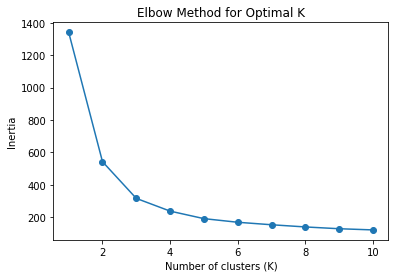

In [18]:
k_values = range(1, 11)
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)

KMeans(n_clusters=3)

In [20]:
customer_data['Cluster'] = kmeans.labels_

In [21]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

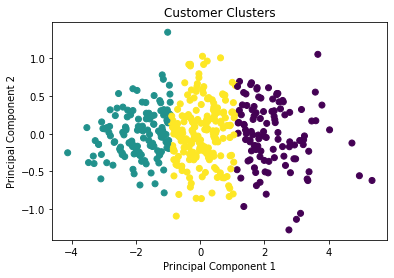

In [22]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Clusters')
plt.show()

In [23]:
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=['TransactionID', 'Qty', 'TotalAmount']
)
print(cluster_centers)

   TransactionID        Qty    TotalAmount
0      15.363636  57.636364  524504.545455
1       7.785185  26.933333  229388.888889
2      11.282178  41.188119  363267.326733


### Modelling using ARIMA

In [24]:
regression_data = merged_data.groupby("Date")["Qty"].sum().reset_index()

In [25]:
regression_data.set_index("Date", inplace=True)
qty_data = regression_data["Qty"]

In [26]:
print(regression_data)

            Qty
Date           
2022-01-01   49
2022-01-02   59
2022-01-03   63
2022-01-04   45
2022-01-05   30
...         ...
2022-12-27   70
2022-12-28   68
2022-12-29   42
2022-12-30   44
2022-12-31   37

[365 rows x 1 columns]


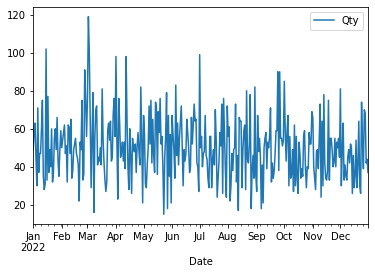

In [27]:
from matplotlib import pyplot

regression_data.plot()
pyplot.show()

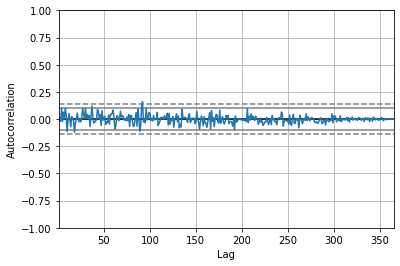

In [28]:
from pandas.plotting import autocorrelation_plot
from pandas import datetime
from pandas import DataFrame


def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

autocorrelation_plot(regression_data)
pyplot.show()

c:\Aplikasi\Anaconda\envs\gpu2\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Aplikasi\Anaconda\envs\gpu2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred fre

                             ARIMA Model Results                              
Dep. Variable:                  D.Qty   No. Observations:                  364
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1562.134
Method:                       css-mle   S.D. of innovations             17.654
Date:                Wed, 27 Sep 2023   AIC                           3138.268
Time:                        10:23:53   BIC                           3165.548
Sample:                    01-02-2022   HQIC                          3149.111
                         - 12-31-2022                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0149      0.248     -0.060      0.952      -0.501       0.471
ar.L1.D.Qty    -0.8721      0.051    -16.998      0.000      -0.973      -0.772
ar.L2.D.Qty    -0.7384      0.067    -11.092    

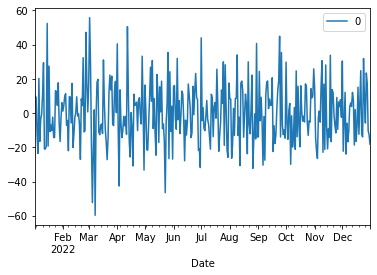

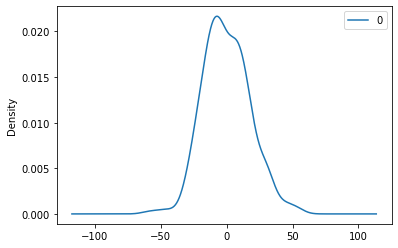

                0
count  364.000000
mean     0.012681
std     17.690052
min    -59.729126
25%    -12.500070
50%     -1.720905
75%     11.227240
max     55.820282


In [29]:
model = ARIMA(regression_data, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=34.763041, expected=34.000000
predicted=38.933179, expected=82.000000
predicted=55.534888, expected=36.000000
predicted=50.500003, expected=27.000000
predicted=46.895942, expected=67.000000


c:\Aplikasi\Anaconda\envs\gpu2\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=44.378346, expected=48.000000
predicted=47.238899, expected=55.000000
predicted=56.596703, expected=46.000000
predicted=49.458224, expected=18.000000
predicted=38.431231, expected=41.000000
predicted=35.149869, expected=21.000000
predicted=26.229893, expected=50.000000
predicted=37.661965, expected=55.000000
predicted=42.668364, expected=58.000000
predicted=54.563226, expected=39.000000
predicted=50.038104, expected=53.000000
predicted=50.004828, expected=50.000000
predicted=47.504428, expected=56.000000
predicted=53.125754, expected=71.000000
predicted=59.717172, expected=32.000000
predicted=52.075693, expected=42.000000
predicted=47.782548, expected=34.000000
predicted=35.835347, expected=38.000000
predicted=37.812721, expected=47.000000
predicted=39.974039, expected=59.000000
predicted=48.633497, expected=59.000000
predicted=55.336911, expected=90.000000
predicted=70.680138, expected=38.000000
predicted=61.584672, expected=90.000000
predicted=72.525355, expected=55.000000


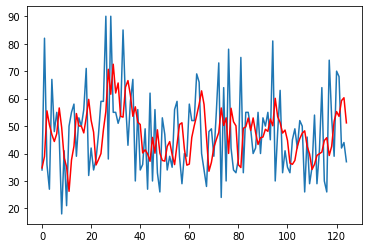

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt


X = regression_data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(2,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [31]:
pip install simager

In [ ]:
from simager.ml import ConfigData, ConfigPreprocess, ConfigModel, AutoClassifier

In [ ]:
config_data = ConfigData(
    target="target",
    cat_features = ["column1", "column2"],
    num_features = ["column3","column4", "column5"]
)
config_preprocess = ConfigPreprocess(
    cat_imputer="SimpleImputer",
    num_imputer="SimpleImputer",
    scaler="RobustScaler",
    encoder="OneHotEncoder"
)
config_model=ConfigModel(algoritm=algoritm=[
    "DecisionTreeClassifier",
    "KNeighborsClassifier",
    "LogisticRegression",
    "SVC",
    "RandomForestClassifier",
    "AdaBoostClassifier",
    "XGBClassifier",
    "LGBMClassifier",
    "CatBoostClassifier"
])